In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import sys
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.layers import Add, Activation, Lambda
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam 
from keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/USML/"
data_bussiness =  pd.read_json(path+"yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=1000000)
data_checkin = pd.read_json(path+"yelp_academic_dataset_checkin.json", lines=True, orient='columns', chunksize=1000000)
data_review = pd.read_json(path+"yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=1000000)
data_tip = pd.read_json(path+"yelp_academic_dataset_tip.json", lines=True, orient='columns', chunksize=1000000)
data_user = pd.read_json(path + "yelp_academic_dataset_user.json", lines=True, orient='columns', chunksize=1000000)

for business in data_bussiness:
    subset_business = business
    break

for checkin in data_checkin:
    subset_checkin = checkin
    break

for review in data_review:
    subset_review = review
    break

# for tip in data_review:
#     subset_tip = tip
#     break

# for user in data_user:
#     subset_user = user
#     break

In [ ]:
subset_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
subset_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
subset_business[["city"]]

,city
0,Santa Barbara
1,Affton
2,Tucson
3,Philadelphia
4,Green Lane
...,...
150341,Edmonton
150342,Nashville
150343,Indianapolis
150344,Edwardsville


In [ ]:
# pd.set_option('display.max_rows', None)
city = subset_business[(subset_business['city']=="Philadelphia")& (subset_business["is_open"]==1)]
Philadelphia = city[["business_id","name","address","city","state","stars","attributes","categories"]]
Philadelphia.head()

,business_id,name,address,city,state,stars,attributes,categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,4.0,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese"
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,4.5,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants"
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,3.5,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,..."
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,3.0,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ..."


In [ ]:
restaurants_philly = Philadelphia[Philadelphia["categories"].str.contains("Restaurant.*") == True].reset_index()
restaurants_philly.head()

,index,business_id,name,address,city,state,stars,attributes,categories
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,4.0,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese"
2,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,4.5,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants"
3,35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,3.5,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,..."
4,82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,3.0,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ..."


In [ ]:
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}") 

In [ ]:
restaurants_philly['BusinessParking'] = restaurants_philly.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'BusinessParking')), axis=1)
restaurants_philly['Ambience'] = restaurants_philly.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Ambience')), axis=1)
restaurants_philly['GoodForMeal'] = restaurants_philly.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'GoodForMeal')), axis=1)
restaurants_philly['Dietary'] = restaurants_philly.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Dietary')), axis=1)
restaurants_philly['Music'] = restaurants_philly.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Music')), axis=1)

In [ ]:
restaurants_philly.head()

,index,business_id,name,address,city,state,stars,attributes,categories,BusinessParking,Ambience,GoodForMeal,Dietary,Music
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'garage': False, 'street': True, 'validated':...",{},{},{},{}
1,15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,4.0,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'valet': False, 'garage': None, 'street': Tru...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': True, 'latenight': None, 'lunch': ...",{},{}
2,19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,4.5,"{'NoiseLevel': 'u'quiet'', 'RestaurantsGoodFor...","Korean, Restaurants","{'garage': False, 'street': True, 'validated':...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
3,35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,3.5,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{}
4,82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,PA,3.0,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'garage': False, 'street': True, 'validated':...","{'romantic': False, 'intimate': False, 'classy...",{},{},{}


In [ ]:
df_attr = pd.concat([ restaurants_philly['attributes'].apply(pd.Series), restaurants_philly['BusinessParking'].apply(pd.Series),
                    restaurants_philly['Ambience'].apply(pd.Series), restaurants_philly['GoodForMeal'].apply(pd.Series), 
                    restaurants_philly['Dietary'].apply(pd.Series) ], axis=1)
df_attr_dummies = pd.get_dummies(df_attr)

In [ ]:
result = restaurants_philly[['name','stars']]

In [ ]:
df_categories_dummies = pd.Series(restaurants_philly['categories']).str.get_dummies(',')

In [ ]:
df_final = pd.concat([df_attr_dummies, df_categories_dummies, result], axis=1)
df_final.drop('Restaurants',inplace=True,axis=1)

In [ ]:
mapper = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}
df_final['stars'] = df_final['stars'].map(mapper)

In [ ]:
subset_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
review = subset_review[["user_id","business_id","stars","date"]]
review.head()

,user_id,business_id,stars,date
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,2018-07-07 22:09:11
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,2012-01-03 15:28:18
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2014-02-05 20:30:30
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,2017-01-14 20:54:15


In [ ]:
restaurant = restaurants_philly[['business_id', 'name', 'address']]

In [ ]:
merge_bussiness_data = pd.merge(review,restaurant , on = 'business_id')
merge_bussiness_data.head()
merge_bussiness_data.shape

(79400, 6)

In [ ]:
merge_bussiness_data.groupby('business_id')['stars'].count().sort_values(ascending=False).head()

business_id
EtKSTHV5Qx_Q7Aur9o4kQQ    1603
cXSyVvOr9YRN9diDkaWs0Q    1444
j-qtdD55OLfSqfsWuQTDJg    1436
S8ZFYEgMejpChID8tzKo9A    1304
vUrTGX_7HxqeoQ_6QCVz6g    1157
Name: stars, dtype: int64

In [ ]:
Filter = merge_bussiness_data['business_id'] == 'EtKSTHV5Qx_Q7Aur9o4kQQ'
print("Name: ", merge_bussiness_data[Filter]['name'].unique())
print("Address:", merge_bussiness_data[Filter]['address'].unique())

Name:  ['Village Whiskey']
Address: ['118 S 20th St']


In [ ]:
rating_crosstab = merge_bussiness_data.pivot_table(values='stars', index='user_id', columns='name', fill_value=0)
rating_crosstab.shape

(47112, 623)

In [ ]:
 rating_crosstab.shape

(47112, 623)

In [ ]:
X = rating_crosstab.values.T
X.shape

(623, 47112)

In [ ]:
SVD = TruncatedSVD(n_components=12, random_state=17)
result_matrix = SVD.fit_transform(X)
result_matrix.shape

(623, 12)

In [ ]:
corr_matrix = np.corrcoef(result_matrix)
corr_matrix.shape

(623, 623)

In [ ]:
restaurant_names = rating_crosstab.columns
restaurants_list = list(restaurant_names)

popular_rest = restaurants_list.index('Village Whiskey')
print("index of the popular restaurant: ", popular_rest) 

index of the popular restaurant:  594


In [ ]:
corr_popular_rest = corr_matrix[popular_rest]
corr_popular_rest.shape  

(623,)

In [ ]:
corr_popular_rest[:30]

array([ 0.17909432,  0.1210279 ,  0.52873942,  0.02472002, -0.02503707,
        0.26558408,  0.27310339,  0.01546364,  0.11214075,  0.18787709,
        0.18737529,  0.16077662,  0.39313817,  0.12679128,  0.06815837,
        0.15778258,  0.54239359,  0.46103021,  0.29695458,  0.16707003,
        0.03621093,  0.01158938,  0.48444431,  0.10112634,  0.51643372,
        0.54938259,  0.43418509,  0.11768615, -0.01162321, -0.00319967])

In [ ]:
recommend=list(restaurant_names[(corr_popular_rest < 1.0) & (corr_popular_rest > 0.8)])

In [ ]:
display(list(restaurant_names[(corr_popular_rest < 1.0) & (corr_popular_rest > 0.8)]))

['Dolce Pizza',
 'Guavaberry Foods & Drinks ',
 'Halal Food Special',
 'Lombard Swim Club',
 'Prince Pizza II',
 'Village Whiskey']

In [ ]:
def precisionatk(recommend, k):
  relevant = 0
  for i in recommend[:k]:
    rating =restaurants_philly[restaurants_philly["name"] == i ]["stars"].values[0]
    if rating >= 4:
      relevant +=1
  return (relevant/k)

In [ ]:
precisionatk(recommend,4)

0.75

In [ ]:
precisionatk(recommend,5)

0.6

In [ ]:
precisionatk(recommend,3)

0.6666666666666666

In [ ]:
display(restaurants_philly[restaurants_philly['name'] == 'Village Whiskey'])

,index,business_id,name,address,city,state,stars,attributes,categories,BusinessParking,Ambience,GoodForMeal,Dietary,Music
262,10607,EtKSTHV5Qx_Q7Aur9o4kQQ,Village Whiskey,118 S 20th St,Philadelphia,PA,4.0,"{'RestaurantsReservations': 'False', 'Restaura...","Bars, Nightlife, Whiskey Bars, Burgers, Restau...","{'garage': False, 'street': True, 'validated':...","{'touristy': False, 'hipster': False, 'romanti...","{'breakfast': False, 'brunch': False, 'lunch':...",{},"{'dj': False, 'background_music': False, 'no_m..."


In [ ]:
merge_bussiness_data_keras = merge_bussiness_data.copy()
merge_bussiness_data_keras.head(1)

,user_id,business_id,stars,date,name,address
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,Zaika,2481 Grant Ave


In [ ]:
user_encode = LabelEncoder()
merge_bussiness_data_keras["user"] = user_encode.fit_transform(merge_bussiness_data_keras["user_id"].values)
unique_users = merge_bussiness_data_keras['user'].nunique()

item_encode = LabelEncoder()
merge_bussiness_data_keras["business"] = item_encode.fit_transform(merge_bussiness_data_keras["business_id"].values)
unique_restaurants = merge_bussiness_data_keras['business'].nunique()

min_rating = min(merge_bussiness_data_keras['stars'])
max_rating = max(merge_bussiness_data_keras['stars'])

print(unique_users, unique_restaurants, min_rating, max_rating)

merge_bussiness_data_keras.head()

47112 667 1 5


,user_id,business_id,stars,date,name,address,user,business
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,Zaika,2481 Grant Ave,27269,535
1,kSMOJwJXuEUqzfmuFncK4A,kxX2SOes4o-D3ZQBkiMRfA,2,2014-07-13 17:25:47,Zaika,2481 Grant Ave,35639,535
2,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5,2010-08-20 19:16:04,Zaika,2481 Grant Ave,37426,535
3,Z-xgVb4nM42943m2wbBkFw,kxX2SOes4o-D3ZQBkiMRfA,5,2017-01-02 14:25:26,Zaika,2481 Grant Ave,26459,535
4,2SEoXb6r6hPKrl9V9VzBgA,kxX2SOes4o-D3ZQBkiMRfA,5,2015-07-28 17:15:20,Zaika,2481 Grant Ave,2583,535


In [ ]:
X = merge_bussiness_data_keras[['user', 'business']].values
y = merge_bussiness_data_keras['stars'].values

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_keras.shape, X_test_keras.shape, y_train_keras.shape, y_test_keras.shape

((63520, 2), (15880, 2), (63520,), (15880,))

In [ ]:
X_train_keras[:, 0]

array([33523, 46892, 39793, ..., 40494,   147,  7906])

In [ ]:
n_factors = 50
X_train_array = [X_train_keras[:, 0], X_train_keras[:, 1]]
X_test_array = [X_test_keras[:, 0], X_test_keras[:, 1]]

In [ ]:
X_train_array, X_test_array

([array([33523, 46892, 39793, ..., 40494,   147,  7906]),
  array([262, 378, 262, ..., 226, 570, 501])],
 [array([ 8137, 35399, 13330, ..., 33999, 43992,  4627]),
  array([ 84, 566, 244, ..., 444, 204, 166])])

In [ ]:
class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal', embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        
        return x
    
def Recommender(n_users, n_rests, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    ub = EmbeddingLayer(n_users, 1)(user)
    
    restaurant = Input(shape=(1,))
    m = EmbeddingLayer(n_rests, n_factors)(restaurant)
    mb = EmbeddingLayer(n_rests, 1)(restaurant)   
    
    x = Dot(axes=1)([u, m])
    x = Add()([x, ub, mb])
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)  
    
    model = Model(inputs=[user, restaurant], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)  
    
    return model

In [ ]:
keras_model = Recommender(unique_users, unique_restaurants, n_factors, min_rating, max_rating)
keras_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        2355600     ['input_1[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        33350       ['input_2[0][0]']                
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
keras_model.fit(x=X_train_array, y=y_train_keras, batch_size=64,\
                          epochs=5, verbose=1, validation_data=(X_test_array, y_test_keras))

Epoch 1/5
993/993 [==============================] - 30s 29ms/step - loss: 2.1192 - val_loss: 1.8733
Epoch 2/5
993/993 [==============================] - 29s 29ms/step - loss: 1.3857 - val_loss: 1.6343
Epoch 3/5
993/993 [==============================] - 28s 28ms/step - loss: 0.5726 - val_loss: 1.6050
Epoch 4/5
993/993 [==============================] - 29s 29ms/step - loss: 0.2310 - val_loss: 1.6059
Epoch 5/5
993/993 [==============================] - 28s 28ms/step - loss: 0.1434 - val_loss: 1.5999


In [ ]:
from tensorflow.keras import models
keras_model.save('NN')

INFO:tensorflow:Assets written to: NN/assets


In [ ]:
predictions = keras_model.predict(X_test_array)

In [ ]:
df_test = pd.DataFrame(X_test_keras[:,0])
df_test.rename(columns={0: "user"}, inplace=True)
df_test['business'] = X_test_keras[:,1]
df_test['stars'] = y_test_keras
df_test["predictions"] = predictions
df_test.head()

,user,business,stars,predictions
0,8137,84,3,3.506280
1,35399,566,5,3.446093
2,13330,244,3,4.274377
3,25930,269,4,3.652898
4,17681,252,5,3.552705


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(df_test['stars'],df_test['predictions']))


1.5819481236617745


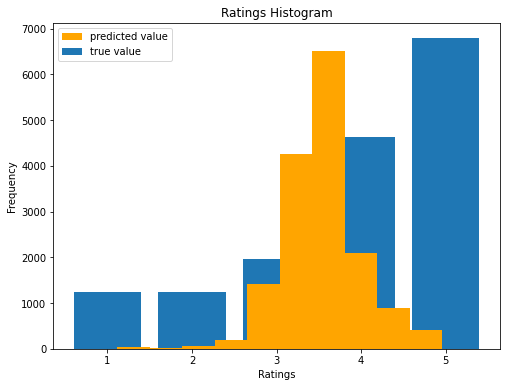

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
values, counts = np.unique(df_test['stars'], return_counts=True)

plt.figure(figsize=(8,6))
plt.bar(values, counts, tick_label=['1','2','3','4','5'], label='true value')
plt.hist(predictions, color='orange', label='predicted value')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Ratings Histogram")
plt.legend()
plt.show()

In [ ]:
emb = keras_model.get_layer('embedding_2')
emb_weights = emb.get_weights()[0]

print("The shape of embedded weights: ", emb_weights.shape)
print("The length of embedded weights: ", len(emb_weights))

The shape of embedded weights:  (667, 50)
The length of embedded weights:  667


In [ ]:
emb_weights = emb_weights / np.linalg.norm(emb_weights, axis = 1).reshape((-1, 1))
len(emb_weights)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


667

In [ ]:
restaurant_id_emb = merge_bussiness_data_keras["business_id"].unique()
len(restaurant_id_emb)

667

In [ ]:
restaurant_pd = pd.DataFrame(emb_weights)
restaurant_pd["business_id"] = restaurant_id_emb
restaurant_pd = restaurant_pd.set_index("business_id")
restaurant_pd

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
business_id,,,,,,,,,,,,,,,,,,,,,
kxX2SOes4o-D3ZQBkiMRfA,-0.139383,0.164508,0.131719,0.131774,-0.111347,0.160210,0.153556,-0.149235,0.133639,-0.123252,...,-0.152362,0.141322,0.135112,-0.151106,-0.159201,0.141628,-0.130496,-0.162885,0.057952,-0.020215
YtSqYv1Q_pOltsVPSx54SA,-0.167463,0.058610,0.150186,0.047650,-0.160960,0.160544,0.171817,0.172676,0.175555,-0.139115,...,0.157352,-0.102989,-0.027841,-0.142962,-0.156903,0.126996,0.130677,-0.149855,0.149973,0.052160
eFvzHawVJofxSnD7TgbZtg,-0.177831,0.167415,-0.170872,0.164476,0.184865,-0.150777,-0.159007,-0.099255,0.054484,0.203968,...,0.155552,0.155974,-0.182247,-0.061242,-0.175353,0.124883,-0.039510,-0.099287,0.177510,-0.162349
kq5Ghhh14r-eCxlVmlyd8w,0.127780,0.156240,-0.166477,0.132584,-0.097279,0.122535,0.130545,-0.126122,-0.122361,-0.141374,...,-0.155109,-0.125181,0.177371,0.144550,0.158709,0.122468,0.193160,0.109678,0.121386,-0.121871
oBhJuukGRqPVvYBfTkhuZA,-0.152308,0.119608,-0.164934,-0.168212,-0.099297,0.194903,0.145088,-0.175214,0.080211,0.121800,...,-0.130320,0.142060,-0.076991,0.141007,0.155090,-0.146816,0.162472,-0.149526,-0.090381,-0.083299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QY9h6QIaBFeExPGNPqiOMg,0.057206,-0.149089,-0.182482,0.090759,-0.207595,-0.188774,0.114414,-0.222059,-0.148121,-0.128278,...,0.079287,-0.063640,-0.162429,0.160034,0.115566,0.131905,0.186312,-0.110627,-0.081735,-0.041299
2f3YghoMYzd5-GFMh_kvwQ,-0.141937,-0.146821,0.133001,0.122657,-0.156976,0.148775,-0.163232,-0.123831,-0.052572,0.155149,...,0.127269,0.123665,-0.166384,0.148356,-0.138437,0.119786,-0.118923,0.153340,0.154058,-0.125197
mzJ7BxxhLtm-TD1vyne1yg,-0.092712,0.109565,-0.142520,-0.152145,-0.171036,-0.093605,0.133628,-0.171474,-0.147015,-0.113874,...,0.147767,-0.128929,0.157664,0.188479,-0.105932,-0.172194,0.147594,-0.166742,-0.165904,-0.140615


In [ ]:
temp = merge_bussiness_data_keras[['business_id', 'name']].drop_duplicates()
df_recommend = pd.merge(restaurant_pd, temp, on='business_id')
df_recommend

,business_id,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,name
0,kxX2SOes4o-D3ZQBkiMRfA,-0.139383,0.164508,0.131719,0.131774,-0.111347,0.160210,0.153556,-0.149235,0.133639,...,0.141322,0.135112,-0.151106,-0.159201,0.141628,-0.130496,-0.162885,0.057952,-0.020215,Zaika
1,YtSqYv1Q_pOltsVPSx54SA,-0.167463,0.058610,0.150186,0.047650,-0.160960,0.160544,0.171817,0.172676,0.175555,...,-0.102989,-0.027841,-0.142962,-0.156903,0.126996,0.130677,-0.149855,0.149973,0.052160,Rittenhouse Grill
2,eFvzHawVJofxSnD7TgbZtg,-0.177831,0.167415,-0.170872,0.164476,0.184865,-0.150777,-0.159007,-0.099255,0.054484,...,0.155974,-0.182247,-0.061242,-0.175353,0.124883,-0.039510,-0.099287,0.177510,-0.162349,Good Karma Cafe
3,kq5Ghhh14r-eCxlVmlyd8w,0.127780,0.156240,-0.166477,0.132584,-0.097279,0.122535,0.130545,-0.126122,-0.122361,...,-0.125181,0.177371,0.144550,0.158709,0.122468,0.193160,0.109678,0.121386,-0.121871,The Coventry Deli
4,oBhJuukGRqPVvYBfTkhuZA,-0.152308,0.119608,-0.164934,-0.168212,-0.099297,0.194903,0.145088,-0.175214,0.080211,...,0.142060,-0.076991,0.141007,0.155090,-0.146816,0.162472,-0.149526,-0.090381,-0.083299,Square 1682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,QY9h6QIaBFeExPGNPqiOMg,0.057206,-0.149089,-0.182482,0.090759,-0.207595,-0.188774,0.114414,-0.222059,-0.148121,...,-0.063640,-0.162429,0.160034,0.115566,0.131905,0.186312,-0.110627,-0.081735,-0.041299,New China
663,2f3YghoMYzd5-GFMh_kvwQ,-0.141937,-0.146821,0.133001,0.122657,-0.156976,0.148775,-0.163232,-0.123831,-0.052572,...,0.123665,-0.166384,0.148356,-0.138437,0.119786,-0.118923,0.153340,0.154058,-0.125197,Del Frisco's Grille
664,mzJ7BxxhLtm-TD1vyne1yg,-0.092712,0.109565,-0.142520,-0.152145,-0.171036,-0.093605,0.133628,-0.171474,-0.147015,...,-0.128929,0.157664,0.188479,-0.105932,-0.172194,0.147594,-0.166742,-0.165904,-0.140615,Neighborhood Ramen
665,E0AKqwkebF15_hvzNSyGlQ,-0.010639,-0.078677,-0.106404,0.148760,-0.090797,0.057746,-0.134805,-0.119974,0.150538,...,-0.019721,-0.171491,0.165330,-0.114768,-0.179373,0.226094,0.216077,0.147110,-0.102377,P. J. Clarke's


In [ ]:
target = df_recommend[df_recommend['name'] == 'Wvrst']
target.iloc[:,1:51]

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49


In [ ]:
def find_similarity_total(rest_name):
    """Recommends restaurant based on the cosine similarity between restaurants"""
    cosine_list_total = []
    result = []

    for i in range(0, df_recommend.shape[0]):
        sample_name = df_recommend[df_recommend["name"] == rest_name].iloc[:,1:51]
        row = df_recommend.iloc[i,1:51]
        cosine_total = np.dot(sample_name, row)
        
        recommended_name = df_recommend.iloc[i,51]
        cosine_list_total.append(cosine_total)
        result.append(recommended_name)
        
    cosine_df_total = pd.DataFrame({"similar_rest" : result, "cosine" : cosine_list_total})

    return cosine_df_total

In [ ]:
result = find_similarity_total('Village Whiskey')

<string>:6: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
result.head()

,similar_rest,cosine
0,Zaika,[0.16506788845514186]
1,Rittenhouse Grill,[-0.07185841286796456]
2,Good Karma Cafe,[0.24335580999690343]
3,The Coventry Deli,[0.18463983691380462]
4,Square 1682,[0.14346011709490336]


In [ ]:
def convert(input):
    return float(str(input).replace('[','').replace(']',''))

In [ ]:
result['cos'] = result.apply(lambda x: convert(x['cosine']), axis=1)

# drop original 'cosine' column (which had values with np.array)
result.drop('cosine', axis=1, inplace=True)

# sort values with cos
result.sort_values('cos', ascending=False).head(10)

,similar_rest,cos
5,Village Whiskey,1.000000
241,Ed's Pizza House,0.528000
252,Convenient Food Mart,0.462892
462,NBC Sports Arena,0.434305
441,Ekta Indian Cuisine,0.406683
81,Flambo Caribbean Restaurant,0.385362
629,Philly Sunnyside Diner,0.377983
129,Los Compadres,0.364998
237,ShopRite of Whitman Plaza,0.363172
301,Craft Hall,0.354180
